# Import Lib

In [1]:
import networkx as nx
import numpy as np
from sthype import SpatialGraph
from sthype.plot import plot_spatial_graph
from sthype.hypergraph.hypergraph_from_spatial_graphs import hypergraph_from_spatial_graphs, graph_segmentation
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Set Up a SpatialGraph

In [2]:
g = nx.Graph()
g.add_edges_from([(1, 2, {'pixels': [np.array([1, 2]), (2, 4), [3,4]]}), (2, 3, {'pixels': [np.array([1, 2]), (0, 1), [1,3]]})])
nx.set_node_attributes(g, {1: (3, 4), 2: (1, 2), 3: (1, 3)}, 'position')
sg = SpatialGraph(g)

# Tests some functions

In [3]:
for edge in sg.edges(data=True):
    print(edge)

(1, 2, {'pixels': [array([1, 2]), (2, 4), [3, 4]]})
(2, 3, {'pixels': [array([1, 2]), (0, 1), [1, 3]]})


In [4]:
for node in sg.nodes(data=True):
    print(node)

(1, {'position': (3, 4)})
(2, {'position': (1, 2)})
(3, {'position': (1, 3)})


In [5]:
print(sg.edge_pixels(1, 2))

LINESTRING (3 4, 2 4, 1 2)


In [6]:
print(sg.edge_pixels(2, 1))

LINESTRING (1 2, 2 4, 3 4)


In [7]:
print(sg.node_position(1))

POINT (3 4)


# Test Plot

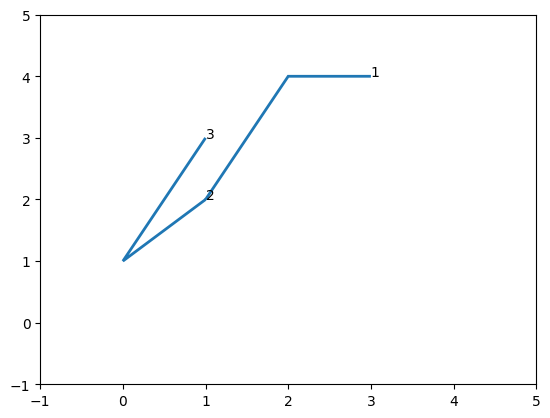

In [8]:
plot = plot_spatial_graph(sg, add_nodes=True, region=[[-1, -1], [5, 5]]);

# Graph Segmentation

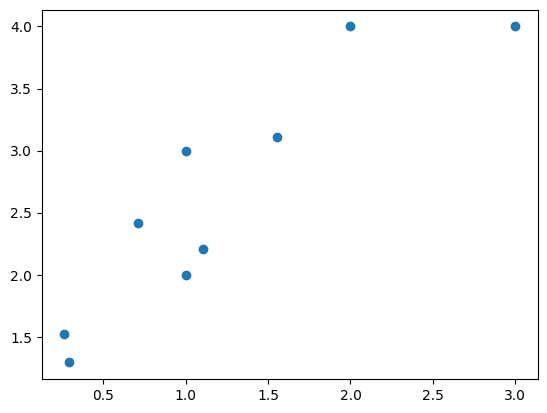

In [9]:
g = graph_segmentation(sg, 1)
points = [data['position'] for _, data in g.nodes(data=True)]
x = [point.x for point in points]
y = [point.y for point in points]
plt.scatter(x,y);

# HyperGraph

(1, 5, {'center': <POINT (1.776 3.553)>, 'edge': {1, 2}, 'centers': [<POINT (1.776 3.553)>, <POINT (1.776 3.553)>], 'centers_distance': [0.0, 0.0], 'activation': 0})
(5, 2, {'center': <POINT (1 2)>, 'edge': {1, 2}, 'centers': [<POINT (1 2)>, <POINT (1 2)>], 'centers_distance': [0.0, 0.0], 'activation': 0})
(2, 7, {'center': <POINT (0.038 1.077)>, 'edge': {2, 3}, 'centers': [<POINT (0.038 1.077)>, <POINT (0.038 1.077)>], 'centers_distance': [2.7755575615628914e-17, 1.3877787807814457e-17], 'activation': 0})
(2, 9, {'center': <POINT (0.039 1.076)>, 'edge': {2, 4}, 'centers': [<POINT (0.039 1.076)>, <POINT (0.038 1.077)>], 'centers_distance': [2.7755575615628914e-17, 0.0008753262427850383], 'activation': 0})
(7, 3, {'center': <POINT (1 3)>, 'edge': {2, 3}, 'centers': [<POINT (1 3)>, <POINT (1 3)>], 'centers_distance': [0.0, 0.0], 'activation': 0})
(9, 10, {'center': <POINT (1.408 3.746)>, 'edge': {2, 4}, 'centers': [<POINT (1.408 3.746)>, <POINT (1.78 3.56)>], 'centers_distance': [4.96506

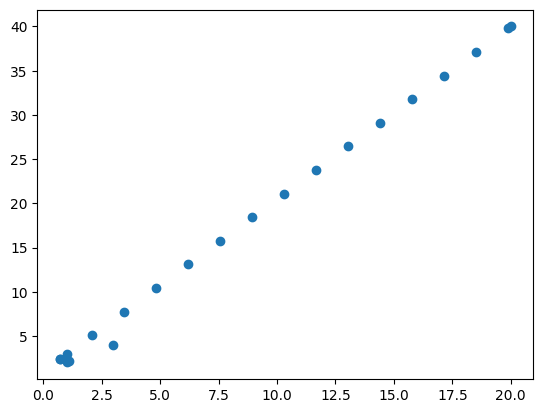

In [11]:
g2 = nx.Graph()
g2.add_edges_from([
    (1, 2, {'pixels': [np.array([1, 2]), (2, 4), [3,4]]}),
    (2, 3, {'pixels': [np.array([1, 2]), (0, 1), [1,3]]}),
    (2, 4, {'pixels': [np.array([1, 2]), (0, 1), [20,40]]})
])
nx.set_node_attributes(g2, {1: (3, 4), 2: (1, 2), 3: (1, 3), 4: (20, 40)}, 'position')
sg2 = SpatialGraph(g2)

g = hypergraph_from_spatial_graphs([sg, sg2], [1, 2], 3, 3)

for n in g.edges(data=True):
    print(n)

g = graph_segmentation(sg2, 3)
points = [data['position'] for _, data in g.nodes(data=True)]
x = [point.x for point in points]
y = [point.y for point in points]
plt.scatter(x,y);